In [1]:
import numpy as np
import pandas as pd
import sys
import os
sys.path.append('../')
from Curve_fitting import GA_functions as GA
from Curve_fitting import curve_fitting as cf
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import scipy

This notebook will be used to fit the experimental scattering curve of an assembly of tubes-like sturtcures with different diameters. 

The simulated scattering curves of the tube-like models are first loaded

In [2]:
filenames = os.listdir('../Data/Simulated_Scattering_Data/')
filenames

['SAXS_RhuA_82.npy',
 'SAXS_RhuA_82_Assembly_13_40OD_30ID_1200long.npy',
 'SAXS_RhuA_82_Assembly_15_44OD_34ID_1200long.npy',
 'SAXS_RhuA_82_Assembly_17_48OD_38ID_1200long.npy',
 'SAXS_RhuA_82_Assembly_19_52OD_42ID_1200long.npy',
 'SAXS_RhuA_82_Assembly_21_58OD_48ID_1200long.npy',
 'SAXS_RhuA_82_Assembly_23_66OD_56ID_1200long.npy',
 'SAXS_RhuA_82_Assembly_25_70OD_60ID_1200long.npy',
 'SAXS_RhuA_82_Assembly_27_74OD_64ID_1200long.npy',
 'SAXS_RhuA_82_Assembly_29_78OD_68ID_1200long.npy']

In [3]:
model0 = np.load('../Data/Simulated_Scattering_Data/' + filenames[0])
model1 = np.load('../Data/Simulated_Scattering_Data/' + filenames[1])
model2 = np.load('../Data/Simulated_Scattering_Data/' + filenames[2])
model3 = np.load('../Data/Simulated_Scattering_Data/' + filenames[3])
model4 = np.load('../Data/Simulated_Scattering_Data/' + filenames[4])
model5 = np.load('../Data/Simulated_Scattering_Data/' + filenames[5])
model6 = np.load('../Data/Simulated_Scattering_Data/' + filenames[6])
model7 = np.load('../Data/Simulated_Scattering_Data/' + filenames[7])
model8 = np.load('../Data/Simulated_Scattering_Data/' + filenames[8])
model9 = np.load('../Data/Simulated_Scattering_Data/' + filenames[9])

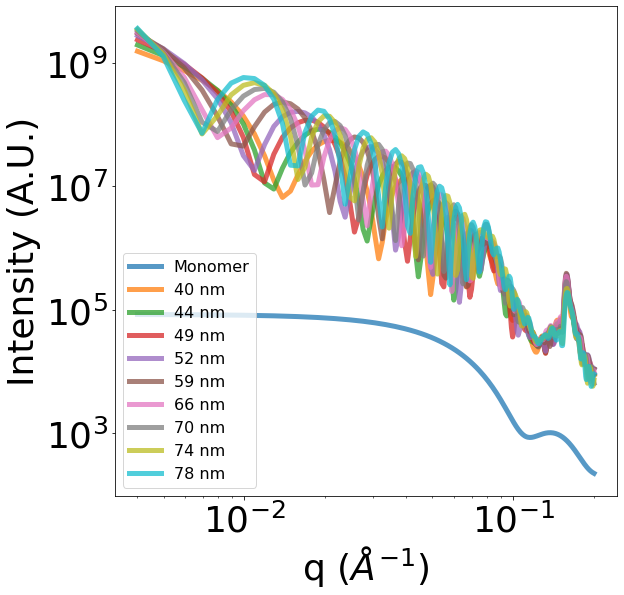

In [4]:
plt.rcParams.update({'font.size': 36})
plt.subplots(figsize=(9,9))
background = 9*10e-6
scale = 0.1
plt.loglog(model0[:,0], model0[:,1], linewidth = 5, alpha = 0.75, label = 'Monomer')
plt.loglog(model1[:,0], model1[:,1], linewidth = 5, alpha = 0.75, label = '40 nm')
plt.loglog(model2[:,0], model2[:,1], linewidth = 5, alpha = 0.75, label = '44 nm')
plt.loglog(model3[:,0], model3[:,1], linewidth = 5, alpha = 0.75, label = '49 nm')
plt.loglog(model4[:,0], model4[:,1], linewidth = 5, alpha = 0.75, label = '52 nm')
plt.loglog(model5[:,0], model5[:,1], linewidth = 5, alpha = 0.75, label = '59 nm')
plt.loglog(model6[:,0], model6[:,1], linewidth = 5, alpha = 0.75, label = '66 nm')
plt.loglog(model7[:,0], model7[:,1], linewidth = 5, alpha = 0.75, label = '70 nm')
plt.loglog(model8[:,0], model8[:,1], linewidth = 5, alpha = 0.75, label = '74 nm')
plt.loglog(model9[:,0], model9[:,1], linewidth = 5, alpha = 0.75, label = '78 nm')

plt.ylabel('Intensity (A.U.)')
plt.xlabel('q ($\AA^{-1}$)')
plt.legend(fontsize=16)
#plt.savefig('../Figures/models_curve.png', dpi=300, bbox_inches="tight")

The experimental data is loaded. This data will be fitted with the simulated scattering curves. 

In [5]:
data = np.load('../Data/Experimental_Scattering_Data/Tubes_Exp_Data.npy')

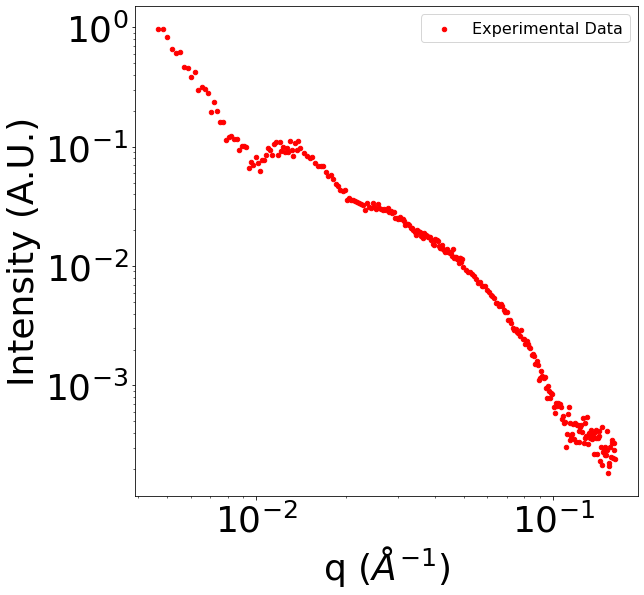

In [6]:
plt.subplots(figsize=(9,9))
plt.scatter(data[:,0], data[:,1]*6*10e-2, label = 'Experimental Data', s = 20, color = 'red')
plt.ylabel('Intensity (A.U.)')
plt.xlabel('q ($\AA^{-1}$)')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=16)

The next step is to fit the experimental data with a weighted average of the simulated scattering curves of the models. The weights obtained represents the population distribution of each model in the sample. To find these weights, a genetic algorithm optimizer will be used to minimize the log mean squared error between the experimental data and the weighted average of the model scattering curves.  

A data processing step will be performed on each simulated data to ensure that all the scattering curves have the same number of data points. The variable "models" is an array of all the modeled curves, where ech column is a curve. 

In [32]:
model_0 = cf.convert_data(data, model0)[:,1].reshape(-1,1)*1000
model_1 = cf.convert_data(data, model1)[:,1].reshape(-1,1)
model_2 = cf.convert_data(data, model2)[:,1].reshape(-1,1)
model_3 = cf.convert_data(data, model3)[:,1].reshape(-1,1)
model_4 = cf.convert_data(data, model4)[:,1].reshape(-1,1)
model_5 = cf.convert_data(data, model5)[:,1].reshape(-1,1)
model_6 = cf.convert_data(data, model6)[:,1].reshape(-1,1)
model_7 = cf.convert_data(data, model7)[:,1].reshape(-1,1)
model_8 = cf.convert_data(data, model8)[:,1].reshape(-1,1)
model_9 = cf.convert_data(data, model9)[:,1].reshape(-1,1)
q = cf.convert_data(data, model9)[:,0]
models = np.hstack((model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9))*1e-7

The code to run the genetic optmization. **Note:** if this code block gives an error, rerun it until it doesn't. The optimization algorithm is somewhat stochastic and depends on the initial random conditions. 

In [33]:
exp_data = data[:,1] - 3e-4
batch_size = 500
mutation_rate = 0.2
iterations = 500
best_solution = cf.run_optimization(exp_data, models, batch_size, mutation_rate, iterations)

In [34]:
_ , model_avg = cf.evaluate_obj_func(best_solution, models, exp_data)

From the genetic optimizaiton, the best weights for the weighted average were obtained. The model curve, which is composed of the weighted average using the best weights, is plotted with together with the experimental curve, and shows good agreement. 

Text(0.5, 0, 'q ($\\AA^{-1}$)')

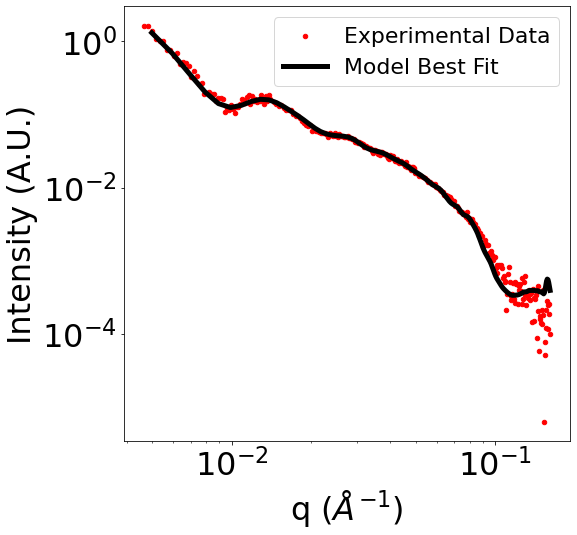

In [35]:
plt.rcParams.update({'font.size': 32})
plt.subplots(figsize=(8,8))
plt.scatter(data[:,0], exp_data, label = 'Experimental Data', s = 20, color = 'red')
#plt.scatter(q, exp_data, label = 'Experimental Data', s = 20, color = 'red')
plt.loglog(q, model_avg, label = 'Model Best Fit', linewidth = 5, alpha = 1, color = 'k')
plt.legend(loc=1, prop={'size': 22})
plt.ylabel('Intensity (A.U.)')
plt.xlabel('q ($\AA^{-1}$)')
#plt.savefig('../Figures/Best_Fit.jpg', dpi=300, bbox_inches="tight")

The best weights can then be plotted to show the distribution of each tube diameter in the sample.

In [37]:
prop = best_solution[0:-1]
prop

array([0.895, 0.154, 0.113, 0.251, 0.496, 0.621, 0.277, 0.06 , 0.074,
       0.105])

Text(0, 0.5, 'Frequency')

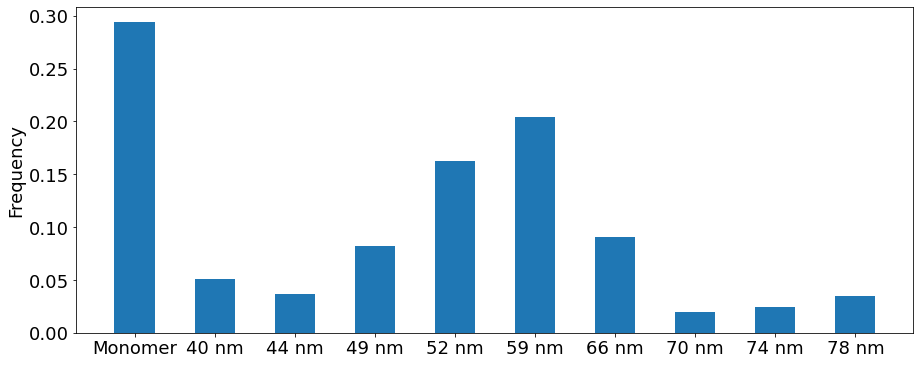

In [38]:
plt.rcParams.update({'font.size': 18})
plt.subplots(figsize=(15,6))
keys = ['Monomer','40 nm', '44 nm', '49 nm','52 nm','59 nm','66 nm', '70 nm', '74 nm','78 nm']
plt.bar(keys, prop/np.sum(prop), width= 0.5)
plt.ylabel('Frequency')
#plt.savefig('../Figures/Fitting/Histogram_RhuA_Assembly_large_font.jpg', dpi=500, bbox_inches="tight")